In [ ]:
# First, let's make sure we import pandas, a library that provides excellent data structure and tools for data manipulation.
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_excel('compiled_risk_data.xlsx')
print(df.head())

     project_name                      Smart contract address  \
0  Data Analytics    384571416209d08623c6ace9422613fc8970475d   
1  Data Analytics   0xAb5801a7D398351b8bE11C439e05C5B3259ae9B   
2  Data Analytics  0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db   
3  Data Analytics  0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB   
4  Data Analytics  0x617F2E2fD72FD9D5503197092aC168c91465E7f2   

                                      Blog post link  \
0  https://chainsecurity.com/security-audit/circl...   
1  https://stackoverflow.com/questions/75030483/w...   
2  https://stackoverflow.com/questions/71115106/s...   
3  https://stackoverflow.com/questions/75030483/w...   
4  https://stackoverflow.com/questions/69466137/h...   

                                       Audit website     Chain  \
0                          https://chainsecurity.com  Ethereum   
1  https://studygroup.moralis.io/t/compilation-er...  Ethereum   
2  https://ethereum.stackexchange.com/questions/1...  Ethereum   
3  https

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_name                                967 non-null    object 
 1   Smart contract address                      967 non-null    object 
 2   Blog post link                              967 non-null    object 
 3   Audit website                               967 non-null    object 
 4   Chain                                       967 non-null    object 
 5   Is_closed_source                            967 non-null    bool   
 6   hidden_owner                                967 non-null    bool   
 7   anti_whale_modifiable                       967 non-null    bool   
 8   Is_anti_whale                               967 non-null    bool   
 9   Is_honeypot                                 967 non-null    bool   
 10  buy_tax       

In [ ]:
df[['immutable_states','events_maths']]

,immutable_states,events_maths
0,True,False
1,False,True
2,False,True
3,True,True
4,False,True
...,...,...
962,False,True
963,False,False
964,True,False
965,True,False


In [ ]:
df['immutable_states'].value_counts()

,count
immutable_states,
False,822
True,145


In [ ]:
risk_columns = ['Is_closed_source','hidden_owner', 'anti_whale_modifiable', 'Is_anti_whale','Is_honeypot','buy_tax', 'sell_tax', 'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation', 'bad_contract', 'reusing_state_variable', 'encode_packed_collision' , 'encode_packed_parameters' , 'centralized_risk_medium', 'centralized_risk_high', 'centralized_risk_low', 'event_setter', 'external_dependencies', 'immutable_states', 'reentrancy_without_eth_transfer', 'incorrect_inheritance_order', 'shadowing_local', 'events_maths' ]

In [ ]:
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]

# This prints out the number of True values for each risk tag.
print(frequencies)

Is_closed_source                   146
hidden_owner                       150
anti_whale_modifiable              112
Is_anti_whale                      138
Is_honeypot                         89
buy_tax                            117
sell_tax                           119
slippage_modifiable                139
Is_blacklisted                      76
can_take_back_ownership            181
owner_change_balance               204
is_airdrop_scam                     65
selfdestruct                       111
trust_list                         140
is_whitelisted                     106
is_fake_token                       87
illegal_unicode                     63
exploitation                       437
bad_contract                       348
reusing_state_variable             115
encode_packed_collision             80
encode_packed_parameters            81
centralized_risk_medium            254
centralized_risk_high              187
centralized_risk_low               170
event_setter             

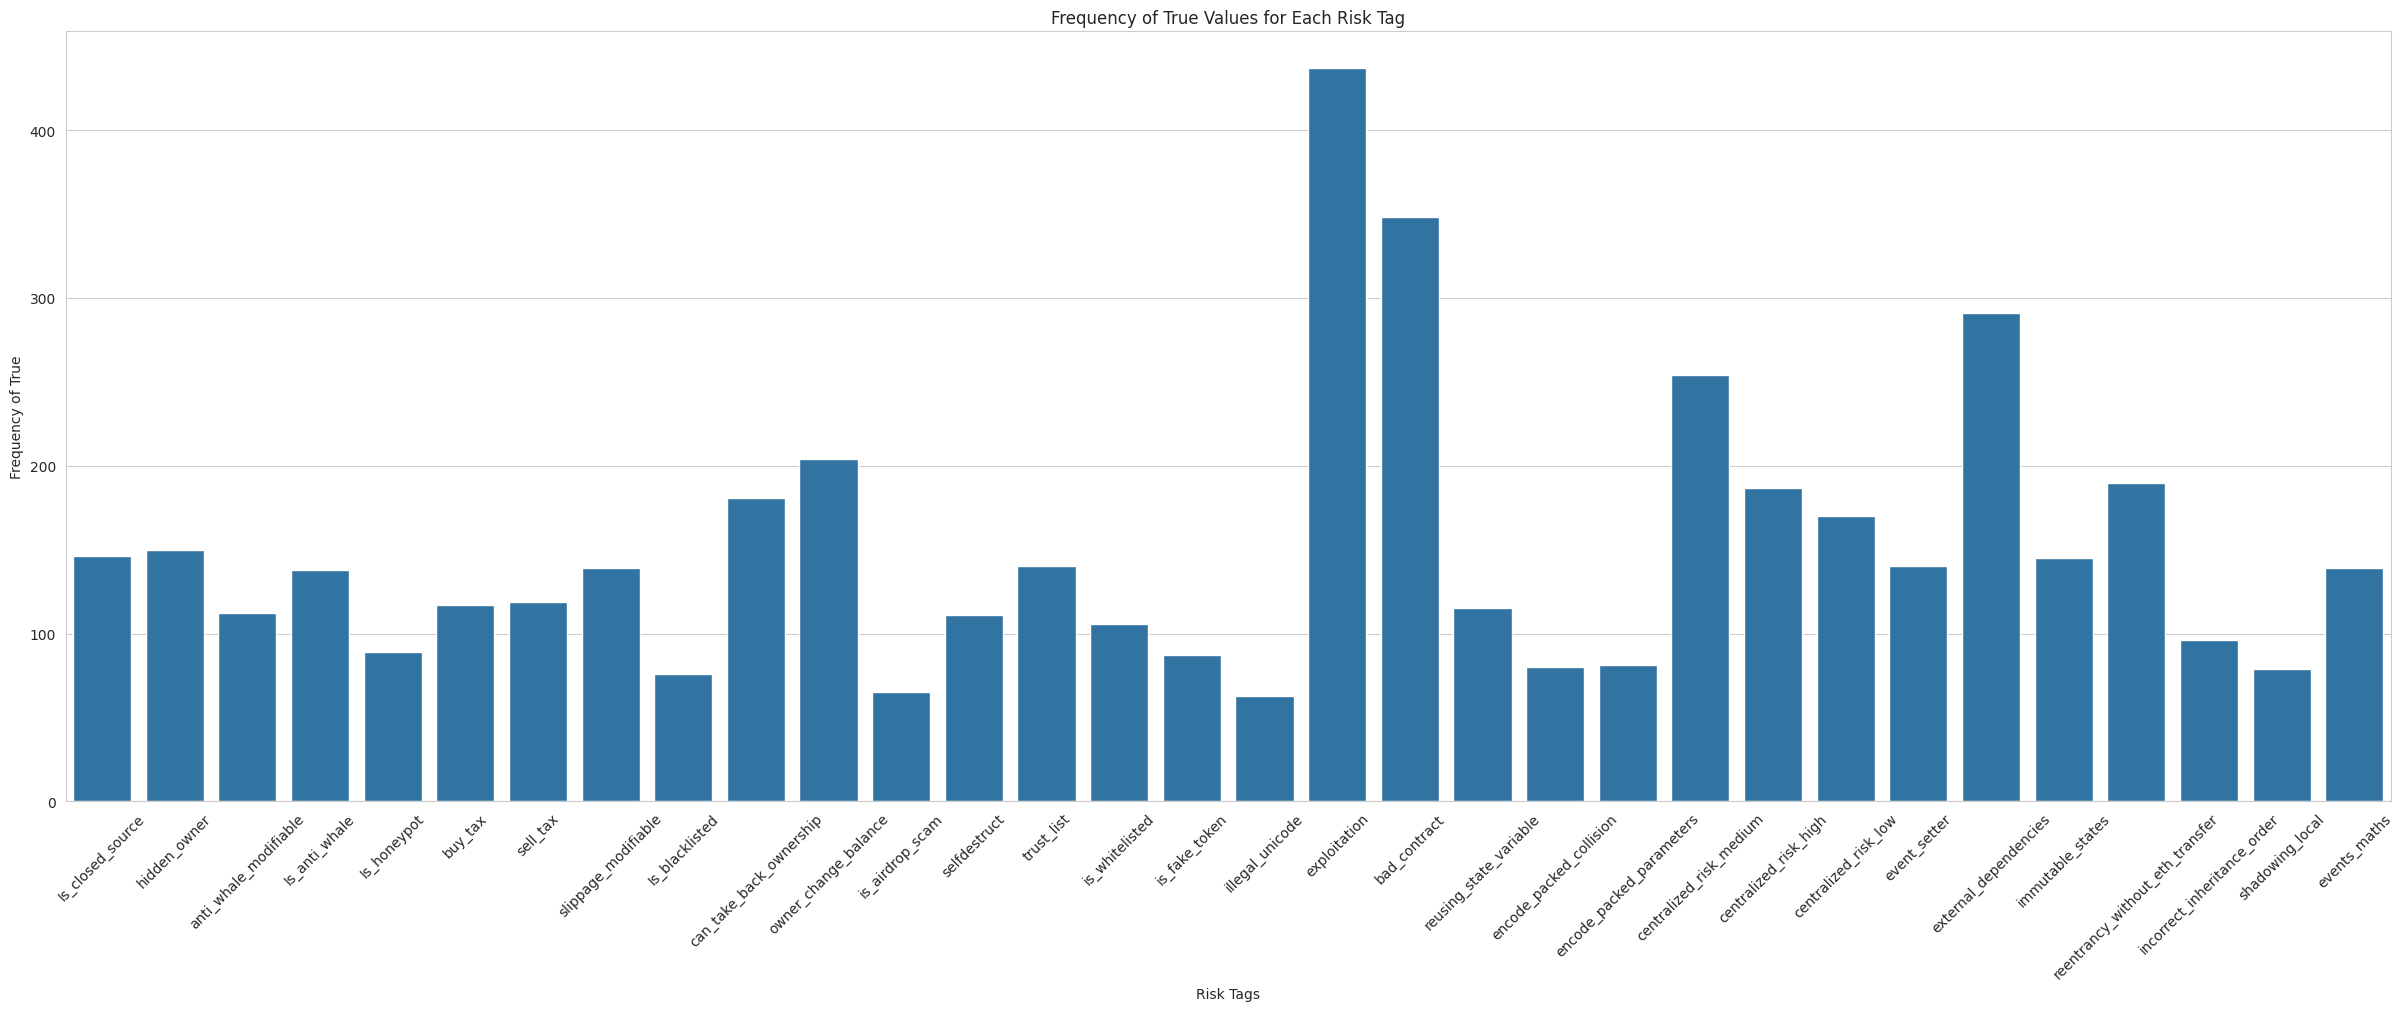

In [ ]:
# Let's set a style for our charts
sns.set_style("whitegrid")

# Create a bar plot to visually represent the frequencies
plt.figure(figsize=(30, 10))
sns.barplot(x=frequencies.index, y=frequencies.values)
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()